In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('/content/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# Task 1 : Display how chlorides are distributed over wine quality.
# distribution of quality in this dataset
df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
sns.countplot(data=df, x='quality')
plt.show()

In [ ]:
sns.histplot(data=df,x='quality')
plt.show()

In [ ]:
sns.kdeplot(data=df,x='quality')
plt.show()

In [ ]:
sns.jointplot(data=df, x='chlorides', y='quality',kind='reg',color='orange',scatter_kws={'alpha':0.3})
plt.show()

<Figure size 300x300 with 0 Axes>

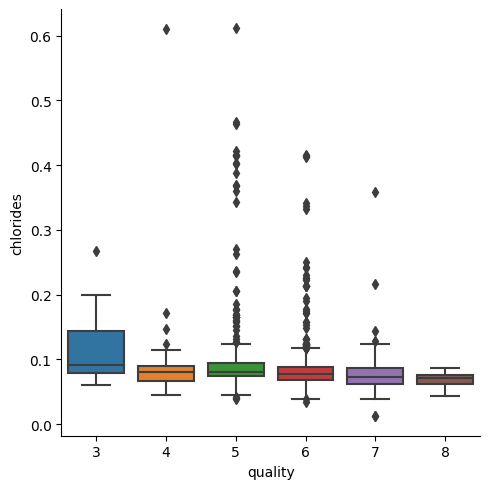

In [30]:
# Task 1 : Display how chlorides are distributed over wine quality.
plt.figure(figsize=(3,3))
sns.catplot(data=df,x='quality',y='chlorides', kind = 'box')
plt.show()

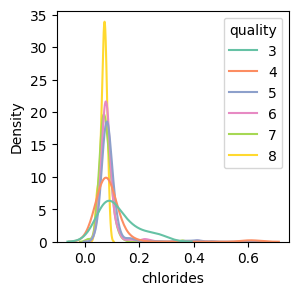

In [29]:
plt.figure(figsize=(3,3))
sns.kdeplot(data=df,x='chlorides',hue='quality',common_norm= False,palette='Set2')
plt.show()

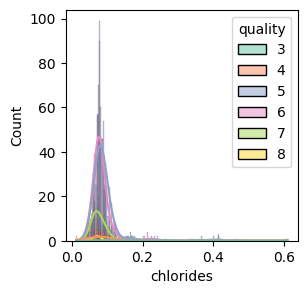

In [31]:
plt.figure(figsize=(3,3))
sns.histplot(data=df,x='chlorides',hue='quality',palette='Set2',kde=True)
plt.show()

In [ ]:
df.iloc[0,:] # means 1st row , and all columns

In [50]:
#task 2: Heat map creation for correlation coefficient
# main task for today
# visualizing the pair-wise correlation Coefficient
# for doing this ,we need to have matrix for each coefficient values ,steps to do so are :
#1) extract all the numeric variable ,exclude cateogrical as we assume Quality as categorical data , so remove it from data frame
# assuming QUALITY as categorical data
#df.iloc[row,column],
new_df=df.iloc[:,0:11] # it means all rows , column from 0 to 11 but 11th column is excluded
new_df.head()
# alocohls index is 10


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [33]:
# calculate the correlation coefficient
coco=new_df.corr() # return matrix each point is pair-wise value
coco
# in below output we can seen diagonal are 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


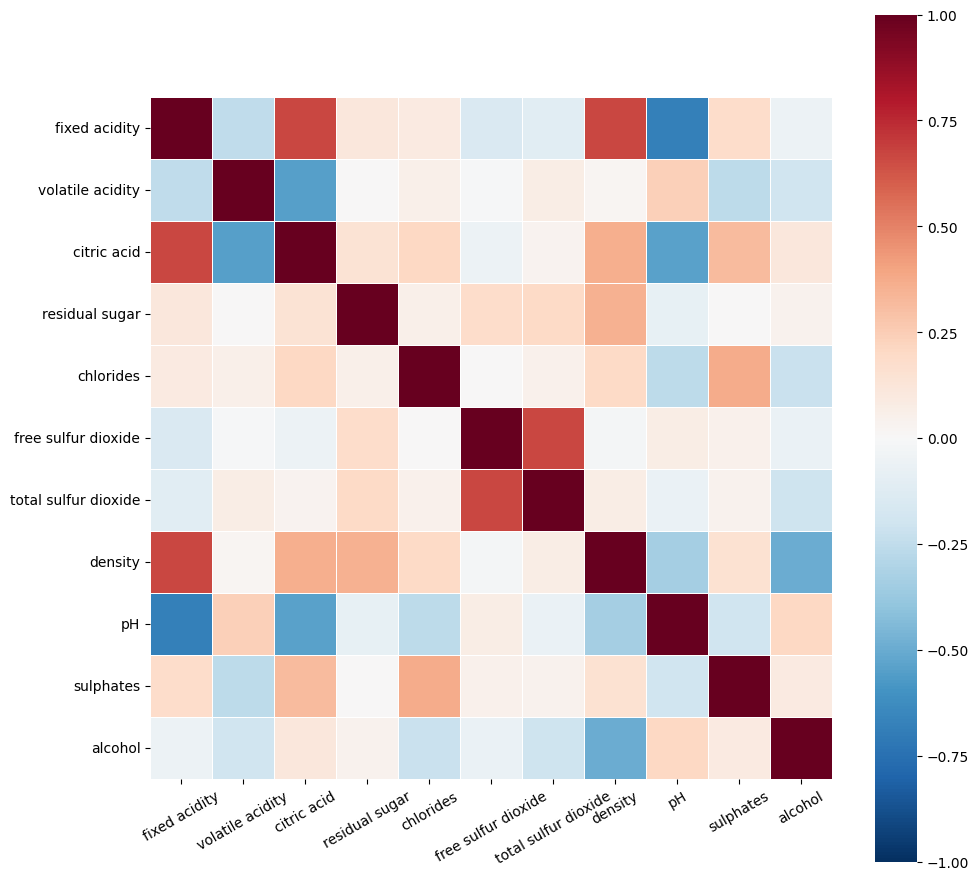

In [41]:
# creating a heatmap for coco
plt.figure(figsize=(11,11))
# sequential color 'YlOrBr'  like can be used for data having values from smaller to higher
# diverging colors like 'RdBu_r' are best to use here because the values lie between +ve to -ve values
sns.heatmap(coco,square=True,cmap='RdBu_r',linewidths=0.6,vmin=-1,vmax=1)
plt.xticks(rotation=30)
plt.show()
#ph and fixed acidity are negatively corelated since the matrix above has max value near to -1

In [51]:
# task assigned in class
# assuming quality as numeric variable now
# create heatmap for data set
# calculate the correlation coefficient
coco1=df.corr() # return matrix each point is pair-wise value
coco1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


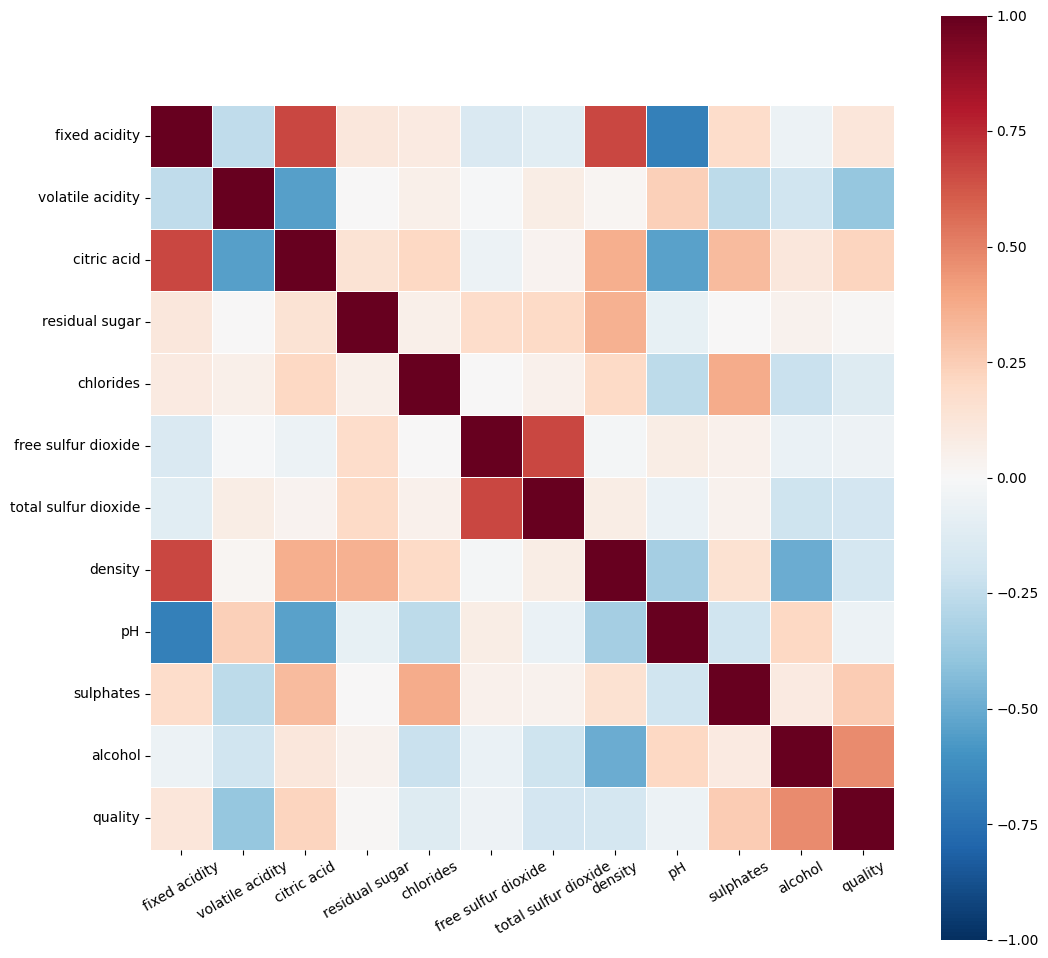

In [53]:
# creating a heatmap for coco
plt.figure(figsize=(12,12))
# sequential color 'YlOrBr'  like can be used for data having values from smaller to higher
# diverging colors like 'RdBu_r' are best to use here because the values lie between +ve to -ve values
sns.heatmap(coco1,square=True,cmap='RdBu_r',linewidths=0.6,vmin=-1,vmax=1)
plt.xticks(rotation=30)
plt.show()


In [55]:
# to remove above triangle for representing the pairwise relation as we  can see the same apttern above nd below the diagonal
#mask
tri_matrix=np.triu(coco)# in this we have coordinates of lower half triangle
print(tri_matrix)

[[ 1.         -0.25613089  0.67170343  0.11477672  0.09370519 -0.15379419
  -0.11318144  0.66804729 -0.68297819  0.18300566 -0.06166827]
 [ 0.          1.         -0.55249568  0.00191788  0.06129777 -0.01050383
   0.07647     0.02202623  0.23493729 -0.26098669 -0.20228803]
 [ 0.          0.          1.          0.14357716  0.20382291 -0.06097813
   0.03553302  0.36494718 -0.54190414  0.31277004  0.10990325]
 [ 0.          0.          0.          1.          0.05560954  0.187049
   0.20302788  0.35528337 -0.08565242  0.00552712  0.04207544]
 [ 0.          0.          0.          0.          1.          0.00556215
   0.04740047  0.20063233 -0.26502613  0.37126048 -0.22114054]
 [ 0.          0.          0.          0.          0.          1.
   0.66766645 -0.02194583  0.0703775   0.05165757 -0.06940835]
 [ 0.          0.          0.          0.          0.          0.
   1.          0.07126948 -0.06649456  0.04294684 -0.20565394]
 [ 0.          0.          0.          0.          0.      

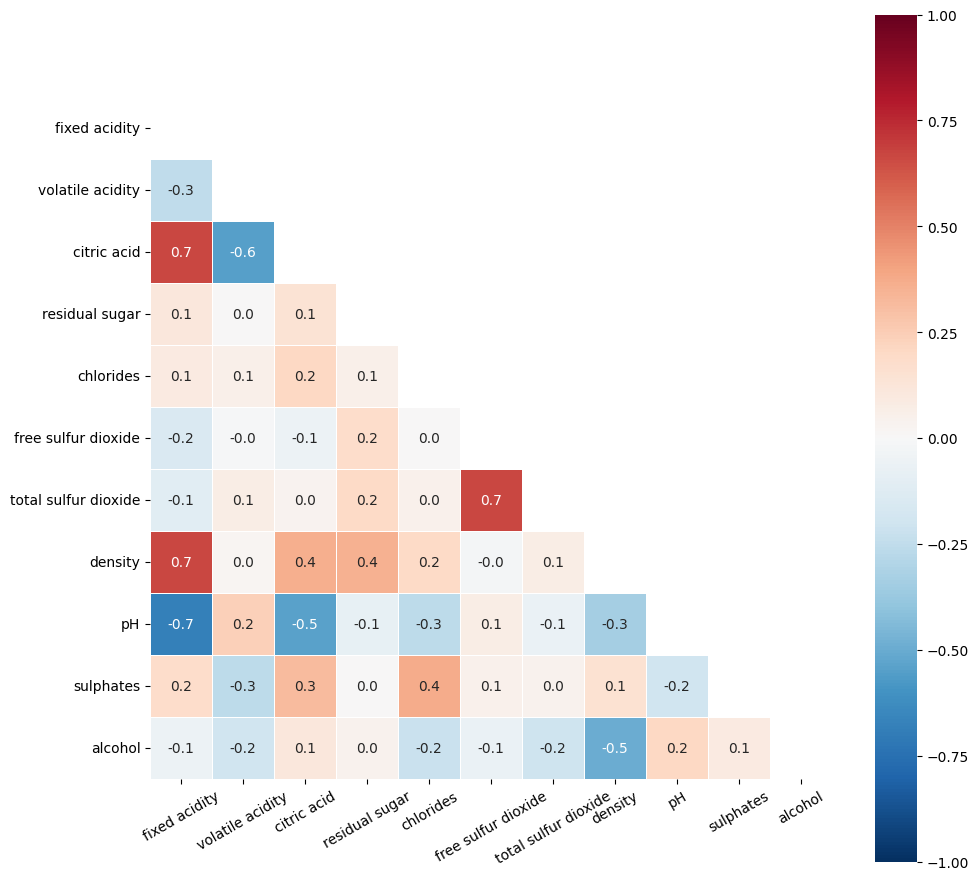

In [59]:
plt.figure(figsize=(11,11))
# sequential color 'YlOrBr'  like can be used for data having values from smaller to higher
# diverging colors like 'RdBu_r' are best to use here because the values lie between +ve to -ve values
# annot to display value in each square, fmt to display equal decimal places values
sns.heatmap(coco,square=True,cmap='RdBu_r',linewidths=0.6,vmin=-1,vmax=1,mask=tri_matrix,annot=True,fmt='.1f')
plt.xticks(rotation=30)
plt.show()

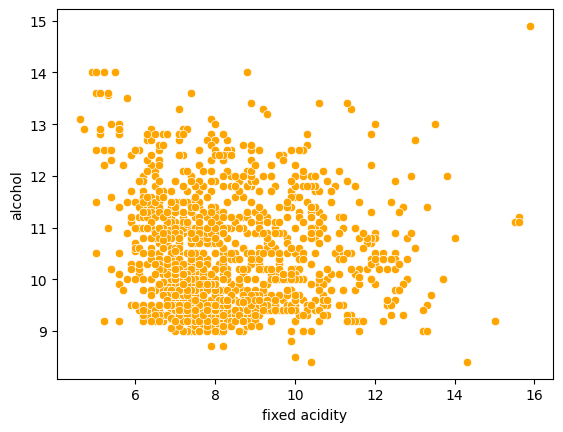

In [66]:
# task 3 Display the relationship between fixed acidity and alcohol.
sns.scatterplot(data=df, x='fixed acidity', y='alcohol',color='orange')
plt.show()

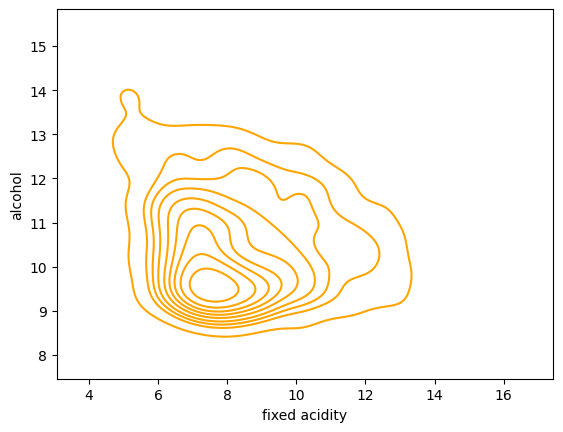

In [67]:
sns.kdeplot(data=df, x='fixed acidity', y='alcohol',color='orange')
plt.show()

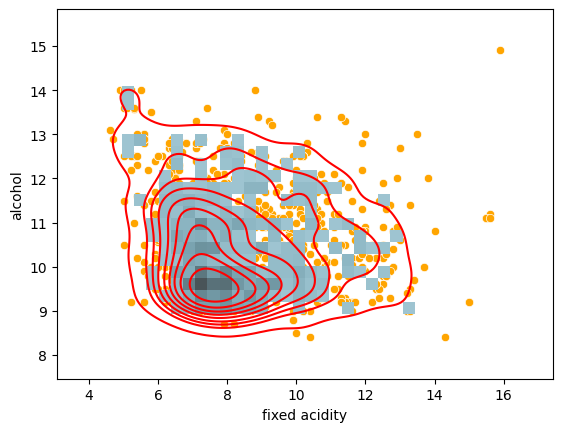

In [70]:
# stacking technique : combining two graphs into same graph
sns.scatterplot(data=df, x='fixed acidity', y='alcohol',color='orange')
sns.histplot(data=df, x='fixed acidity', y='alcohol',color='lightblue',pthresh=0.1)# pthresh removes some parts of histplot
sns.kdeplot(data=df, x='fixed acidity', y='alcohol',color='red')
plt.show()

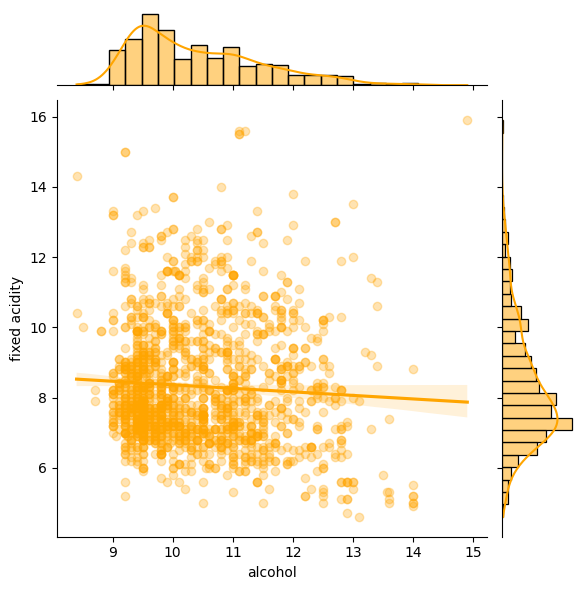

In [74]:
# to develop the reggression line
sns.jointplot(data=df, x='alcohol', y='fixed acidity',kind='reg',color='orange',scatter_kws={'alpha':0.3})
plt.show()

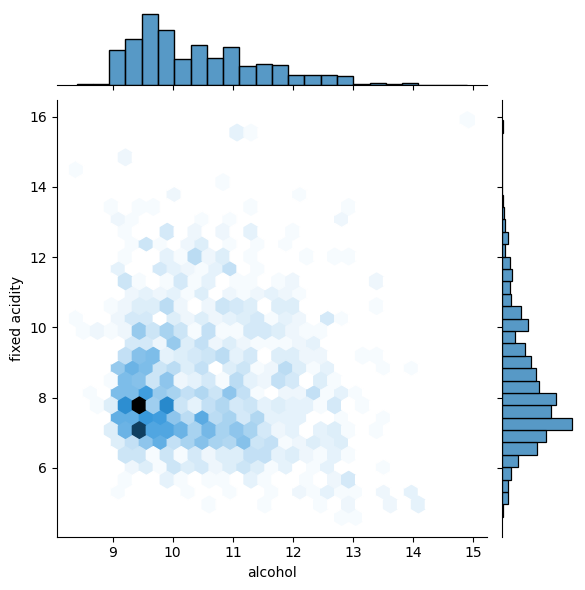

In [75]:
sns.jointplot(data=df, x='alcohol', y='fixed acidity',kind='hex')
plt.show()

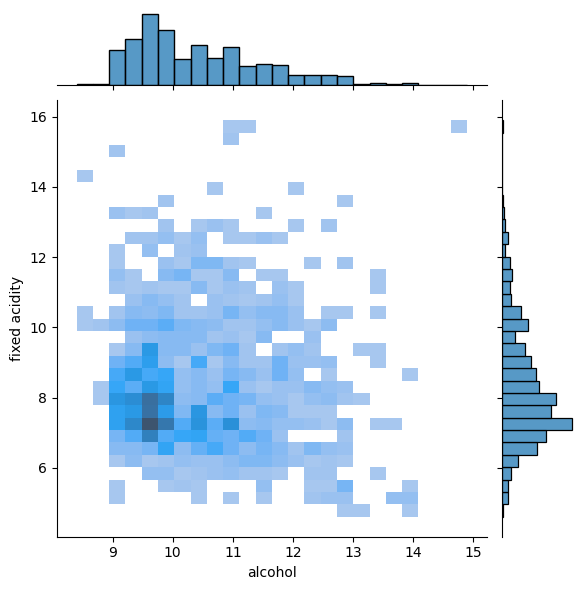

In [76]:
sns.jointplot(data=df, x='alcohol', y='fixed acidity',kind='hist')
plt.show()

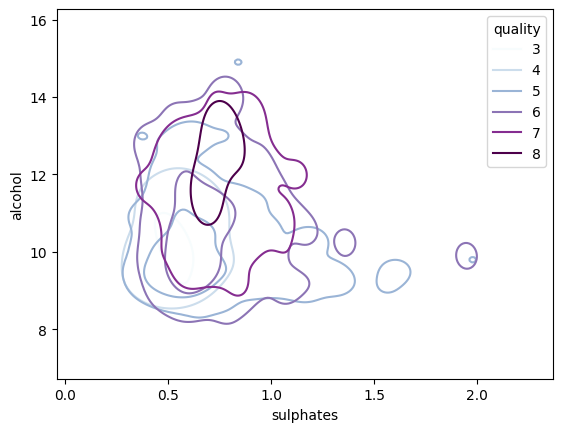

In [86]:
#contour plot
#TAsk 4: Kde plot for sulphates over wine quality.
sns.kdeplot(data=df,y='alcohol',x='sulphates',hue='quality',palette='BuPu',bw_adjust=1,levels=3)#bw_adjust for smoothness,
#levels give limited number of contour lines
plt.show()